# Lab 11-1. Convolution neural network basics

## 1. Make an image 3 x 3 x 1(1byte, 256 gray)

In [3]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

(1, 3, 3, 1)


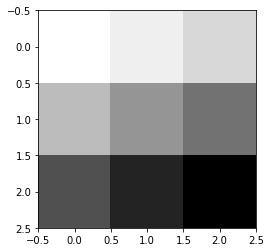

In [4]:
sess = tf.InteractiveSession()
image = np.array([[[[1],[2],[3]],
                  [[4],[5],[6]],
                  [[7],[8],[9]]]], dtype=np.float32)
print(image.shape)
plt.imshow(image.reshape(3,3), cmap='Greys')
#sess.close()

## 2. Convolution layer without zero padding

image.shape: (1, 3, 3, 1)
weight.shape: (2, 2, 1, 1)
conv2d_img.shape: (1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


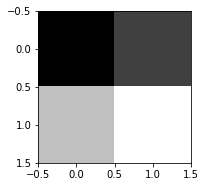

In [23]:
print("image.shape:", image.shape)
weight = tf.constant([[[[1.]], [[1.]]],
                      [[[1.]], [[1.]]]])
print("weight.shape:", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding='VALID')
conv2d_img = conv2d.eval()
print("conv2d_img.shape:", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2, 2))
    plt.subplot(1, 2, i + 1), plt.imshow(one_img.reshape(2, 2), cmap='gray')

## 3. Convolution layer with zero padding

image.shape: (1, 3, 3, 1)
weight.shape: (2, 2, 1, 1)
conv2d_img.shape: (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


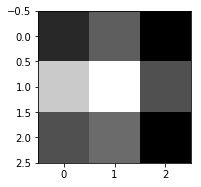

In [26]:
print("image.shape:", image.shape)
weight = tf.constant([[[[1.]], [[1.]]],
                      [[[1.]], [[1.]]]])
print("weight.shape:", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding='SAME')
conv2d_img = conv2d.eval()
print("conv2d_img.shape:", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3, 3))
    plt.subplot(1, 2, i + 1), plt.imshow(one_img.reshape(3, 3), cmap='gray')

## 3. Filters (2 x 2 x 1 x 3)

image.shape: (1, 3, 3, 1)
weight.shape: (2, 2, 1, 3)
conv2d_img.shape: (1, 3, 3, 3)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


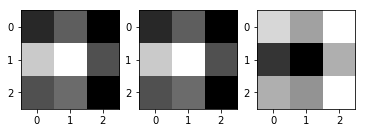

In [28]:
print("image.shape:", image.shape)

weight = tf.constant([[[[1.,10.,-1.]],[[1.,10.,-1.]]],
                      [[[1.,10.,-1.]],[[1.,10.,-1.]]]])
print("weight.shape:", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
conv2d_img = conv2d.eval()
print("conv2d_img.shape:", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

## 4. Pooling (Max Pooling)

In [30]:
image = np.array([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1],
                    strides=[1, 1, 1, 1], padding='SAME')
print(pool.shape)
print(pool.eval())

(1, 2, 2, 1)
[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]


## 5. MNIST image loading

Extracting ../../mnist_data/train-images-idx3-ubyte.gz
Extracting ../../mnist_data/train-labels-idx1-ubyte.gz
Extracting ../../mnist_data/t10k-images-idx3-ubyte.gz
Extracting ../../mnist_data/t10k-labels-idx1-ubyte.gz


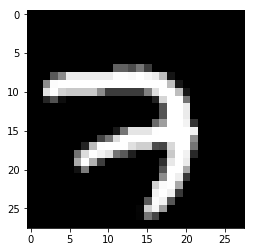

In [33]:
from tensorflow.examples.tutorials.mnist import input_data                      
mnist = input_data.read_data_sets("../../mnist_data/", one_hot=True)

# Display image
img = mnist.train.images[0].reshape(28,28)
plt.imshow(img, cmap='gray')

## 6. MNIST convolution layer with 5 filters

/usr/local/lib/python3.4/dist-packages/tensorflow/python/client/session.py:1711: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Tensor("Conv2D_9:0", shape=(1, 14, 14, 5), dtype=float32)


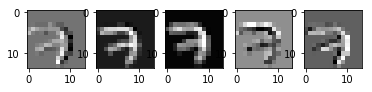

In [34]:
sess = tf.InteractiveSession()

img = img.reshape(-1,28,28,1)
W1 = tf.Variable(tf.random_normal([3, 3, 1, 5], stddev=0.01))
conv2d = tf.nn.conv2d(img, W1, strides=[1, 2, 2, 1], padding='SAME')
print(conv2d)
sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14), cmap='gray')

## 7. MNIST Max pooling

Tensor("MaxPool_2:0", shape=(1, 7, 7, 5), dtype=float32)


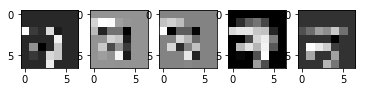

In [35]:
pool = tf.nn.max_pool(conv2d, ksize=[1, 2, 2, 1], strides=[
                        1, 2, 2, 1], padding='SAME')
print(pool)
sess.run(tf.global_variables_initializer())
pool_img = pool.eval()
pool_img = np.swapaxes(pool_img, 0, 3)
for i, one_img in enumerate(pool_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(7, 7), cmap='gray')